In [1]:
import numpy as np 
import pandas as pd
import collections # counter
import matplotlib.pyplot as plt
import seaborn as sns
from copy import *
from statistics import mean

from sklearn.metrics import accuracy_score, log_loss, classification_report, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.utils import column_or_1d
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.feature_selection import VarianceThreshold

In [2]:
folder = 'csv_he'
# folder = 'csv_pp_500'
# folder = 'csv_b_500'
# selection_method = 1
selection_method = 2

In [3]:
pd.options.display.max_columns = None
# cv = False 
cv = True
k = 5

# train/test set size (%)
if cv == False:
    test_size = 0.20
    k = 1

In [4]:
fs = "anova"
# fs = "anova_rf"
# fs = "lasso"
if fs == "lasso":
    k = 1

In [5]:
# Load data
X_train, X_test, y_train, y_test = list(), list(), list(), list()
for i in range(k):
    X_train.append(pd.read_csv(folder + '/' + fs + '_train_data_' + str(selection_method) + '_cv_' + str(cv) + '_' + str(i) + '.csv'))
    X_test.append(pd.read_csv(folder + '/' + fs + '_test_data_' + str(selection_method) + '_cv_' + str(cv) + '_' + str(i) + '.csv'))

    if fs == "lasso":
        cv = False
    y_train.append(pd.read_csv(folder + '/train_label_' + str(selection_method) + '_cv_' + str(cv) + '_' + str(i) + '.csv'))
    y_test.append(pd.read_csv(folder + '/test_label_' + str(selection_method) + '_cv_' + str(cv) + '_' + str(i) + '.csv'))

In [6]:
X_train[0].columns

Index(['city_type_1', 'device.type_mobile', 'browser.name_Chrome',
       'n_filter_no_buy', 'pv_product_mean_eff_duration_no_buy',
       'user_mean_eff_duration', 'n_sessions', 'load_time_no_buy',
       'n_unique_category_u', 'day_1'],
      dtype='object')

In [28]:
classifiers = [
    DecisionTreeClassifier(),
#     DecisionTreeClassifier(max_depth=3),
#     DecisionTreeClassifier(max_depth=6),

    RandomForestClassifier(),
#     RandomForestClassifier(max_depth=3),
#     RandomForestClassifier(max_depth=6),

    GradientBoostingClassifier(),
#     GradientBoostingClassifier(max_depth=1),

    LogisticRegression(solver='liblinear', penalty='l1'),
    
    MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1),
    
    SVC(kernel='linear',probability=True, degree=3)
]

CV = 0



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


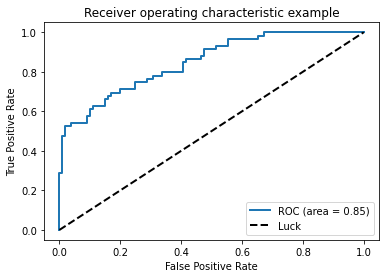

acc: 0.78125
prec: 0.7142857142857143
rec: 0.6779661016949152
Classification report - GradientBoostingClassifier:
Success ratio: 75.98%
              precision    recall  f1-score   support

       False       0.82      0.84      0.83       101
        True       0.71      0.68      0.70        59

    accuracy                           0.78       160
   macro avg       0.77      0.76      0.76       160
weighted avg       0.78      0.78      0.78       160

Confusion matrix: 
[[85 16]
 [19 40]]


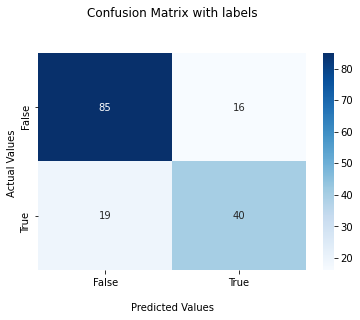

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


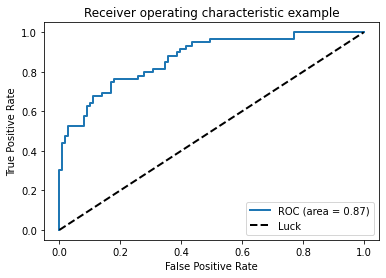

acc: 0.79375
prec: 0.7096774193548387
rec: 0.7457627118644068
Classification report - GradientBoostingClassifier:
Success ratio: 78.38%
              precision    recall  f1-score   support

       False       0.85      0.82      0.83       101
        True       0.71      0.75      0.73        59

    accuracy                           0.79       160
   macro avg       0.78      0.78      0.78       160
weighted avg       0.80      0.79      0.79       160

Confusion matrix: 
[[83 18]
 [15 44]]


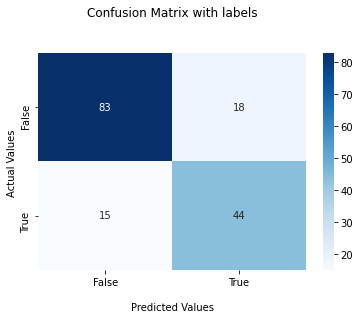

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


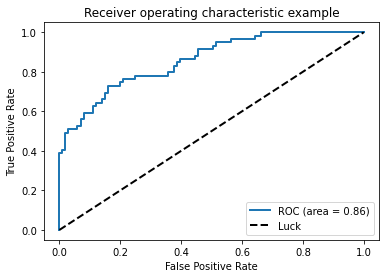

acc: 0.78125
prec: 0.7222222222222222
rec: 0.6610169491525424
Classification report - GradientBoostingClassifier:
Success ratio: 75.63%
              precision    recall  f1-score   support

       False       0.81      0.85      0.83       101
        True       0.72      0.66      0.69        59

    accuracy                           0.78       160
   macro avg       0.77      0.76      0.76       160
weighted avg       0.78      0.78      0.78       160

Confusion matrix: 
[[86 15]
 [20 39]]


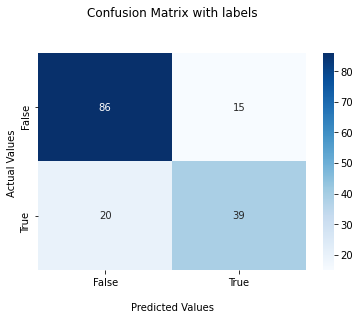

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


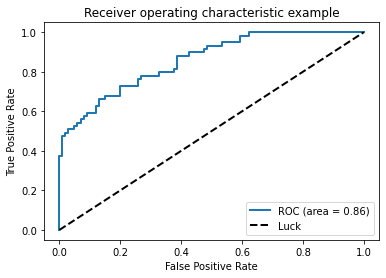

acc: 0.7875
prec: 0.7272727272727273
rec: 0.6779661016949152
Classification report - GradientBoostingClassifier:
Success ratio: 76.47%
              precision    recall  f1-score   support

       False       0.82      0.85      0.83       101
        True       0.73      0.68      0.70        59

    accuracy                           0.79       160
   macro avg       0.77      0.76      0.77       160
weighted avg       0.79      0.79      0.79       160

Confusion matrix: 
[[86 15]
 [19 40]]


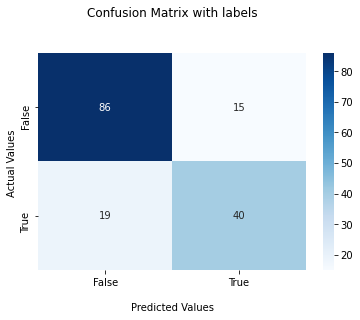

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


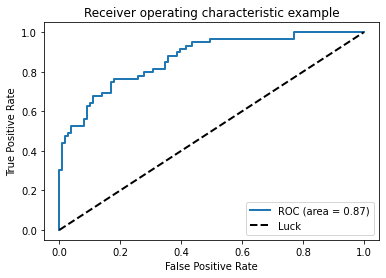

acc: 0.79375
prec: 0.7096774193548387
rec: 0.7457627118644068
Classification report - GradientBoostingClassifier:
Success ratio: 78.38%
              precision    recall  f1-score   support

       False       0.85      0.82      0.83       101
        True       0.71      0.75      0.73        59

    accuracy                           0.79       160
   macro avg       0.78      0.78      0.78       160
weighted avg       0.80      0.79      0.79       160

Confusion matrix: 
[[83 18]
 [15 44]]


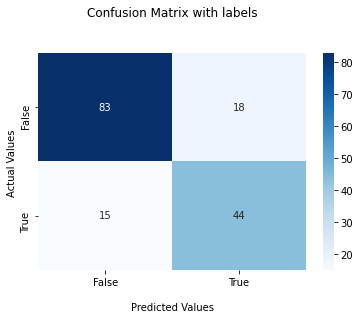

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


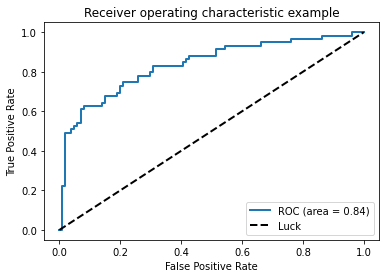

acc: 0.78125
prec: 0.7307692307692307
rec: 0.6440677966101694
Classification report - GradientBoostingClassifier:
Success ratio: 75.27%
              precision    recall  f1-score   support

       False       0.81      0.86      0.83       101
        True       0.73      0.64      0.68        59

    accuracy                           0.78       160
   macro avg       0.77      0.75      0.76       160
weighted avg       0.78      0.78      0.78       160

Confusion matrix: 
[[87 14]
 [21 38]]


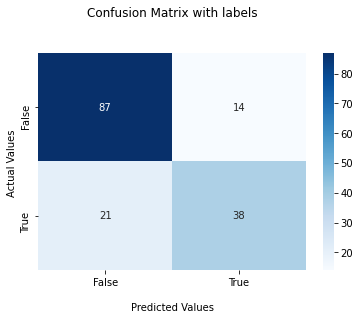

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


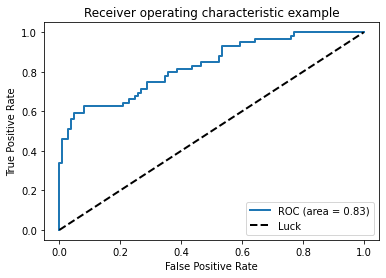

acc: 0.775
prec: 0.7254901960784313
rec: 0.6271186440677966
Classification report - GradientBoostingClassifier:
Success ratio: 74.43%
              precision    recall  f1-score   support

       False       0.80      0.86      0.83       101
        True       0.73      0.63      0.67        59

    accuracy                           0.78       160
   macro avg       0.76      0.74      0.75       160
weighted avg       0.77      0.78      0.77       160

Confusion matrix: 
[[87 14]
 [22 37]]


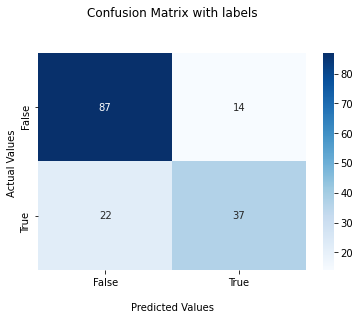

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


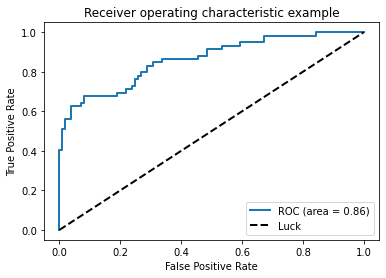

acc: 0.76875
prec: 0.6896551724137931
rec: 0.6779661016949152
Classification report - GradientBoostingClassifier:
Success ratio: 74.99%
              precision    recall  f1-score   support

       False       0.81      0.82      0.82       101
        True       0.69      0.68      0.68        59

    accuracy                           0.77       160
   macro avg       0.75      0.75      0.75       160
weighted avg       0.77      0.77      0.77       160

Confusion matrix: 
[[83 18]
 [19 40]]


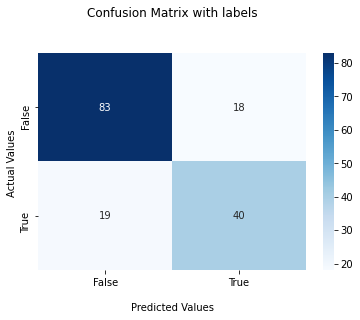

 
CV = 1



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


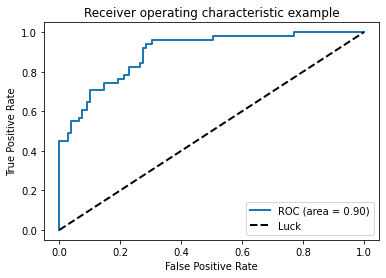

acc: 0.81875
prec: 0.72
rec: 0.7058823529411765
Classification report - GradientBoostingClassifier:
Success ratio: 78.87%
              precision    recall  f1-score   support

       False       0.86      0.87      0.87       109
        True       0.72      0.71      0.71        51

    accuracy                           0.82       160
   macro avg       0.79      0.79      0.79       160
weighted avg       0.82      0.82      0.82       160

Confusion matrix: 
[[95 14]
 [15 36]]


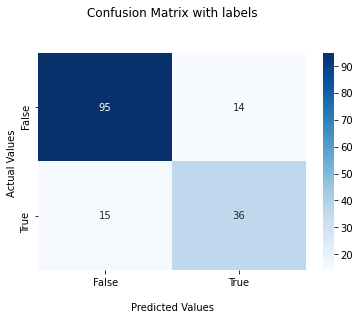

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


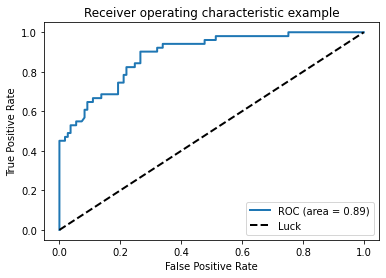

acc: 0.7875
prec: 0.660377358490566
rec: 0.6862745098039216
Classification report - GradientBoostingClassifier:
Success ratio: 76.06%
              precision    recall  f1-score   support

       False       0.85      0.83      0.84       109
        True       0.66      0.69      0.67        51

    accuracy                           0.79       160
   macro avg       0.76      0.76      0.76       160
weighted avg       0.79      0.79      0.79       160

Confusion matrix: 
[[91 18]
 [16 35]]


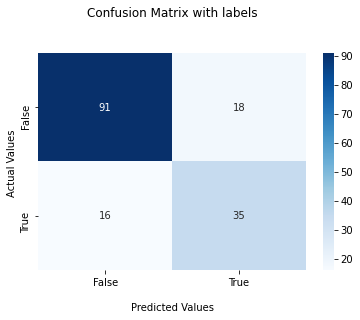

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


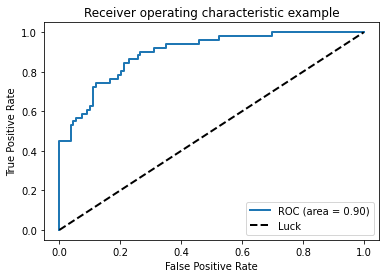

acc: 0.83125
prec: 0.7307692307692307
rec: 0.7450980392156863
Classification report - GradientBoostingClassifier:
Success ratio: 80.83%
              precision    recall  f1-score   support

       False       0.88      0.87      0.88       109
        True       0.73      0.75      0.74        51

    accuracy                           0.83       160
   macro avg       0.81      0.81      0.81       160
weighted avg       0.83      0.83      0.83       160

Confusion matrix: 
[[95 14]
 [13 38]]


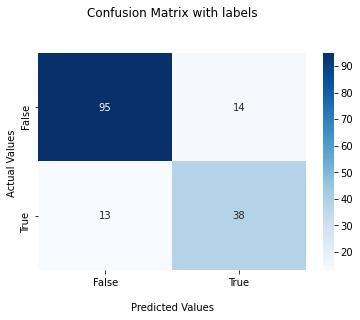

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


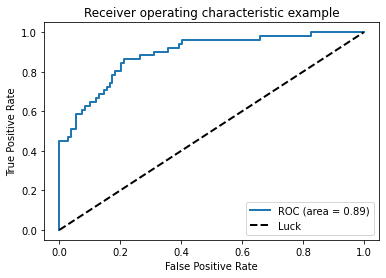

acc: 0.80625
prec: 0.6923076923076923
rec: 0.7058823529411765
Classification report - GradientBoostingClassifier:
Success ratio: 77.95%
              precision    recall  f1-score   support

       False       0.86      0.85      0.86       109
        True       0.69      0.71      0.70        51

    accuracy                           0.81       160
   macro avg       0.78      0.78      0.78       160
weighted avg       0.81      0.81      0.81       160

Confusion matrix: 
[[93 16]
 [15 36]]


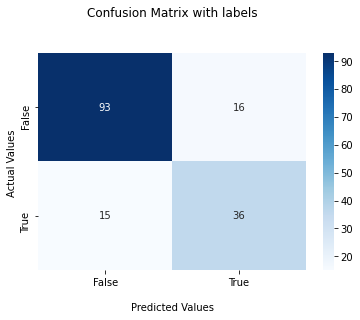

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


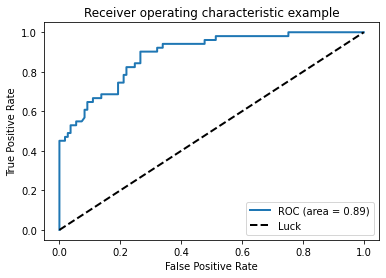

acc: 0.7875
prec: 0.660377358490566
rec: 0.6862745098039216
Classification report - GradientBoostingClassifier:
Success ratio: 76.06%
              precision    recall  f1-score   support

       False       0.85      0.83      0.84       109
        True       0.66      0.69      0.67        51

    accuracy                           0.79       160
   macro avg       0.76      0.76      0.76       160
weighted avg       0.79      0.79      0.79       160

Confusion matrix: 
[[91 18]
 [16 35]]


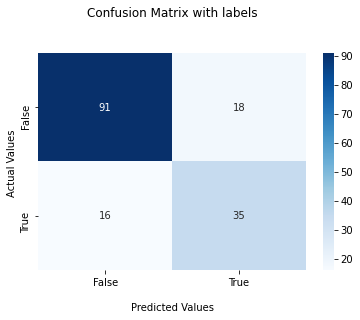

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


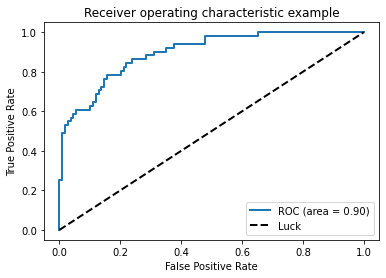

acc: 0.81875
prec: 0.7115384615384616
rec: 0.7254901960784313
Classification report - GradientBoostingClassifier:
Success ratio: 79.39%
              precision    recall  f1-score   support

       False       0.87      0.86      0.87       109
        True       0.71      0.73      0.72        51

    accuracy                           0.82       160
   macro avg       0.79      0.79      0.79       160
weighted avg       0.82      0.82      0.82       160

Confusion matrix: 
[[94 15]
 [14 37]]


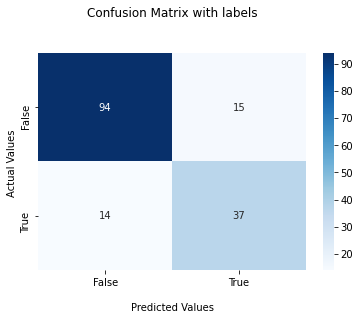

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


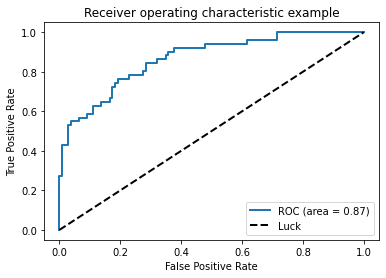

acc: 0.79375
prec: 0.6956521739130435
rec: 0.6274509803921569
Classification report - GradientBoostingClassifier:
Success ratio: 74.95%
              precision    recall  f1-score   support

       False       0.83      0.87      0.85       109
        True       0.70      0.63      0.66        51

    accuracy                           0.79       160
   macro avg       0.76      0.75      0.76       160
weighted avg       0.79      0.79      0.79       160

Confusion matrix: 
[[95 14]
 [19 32]]


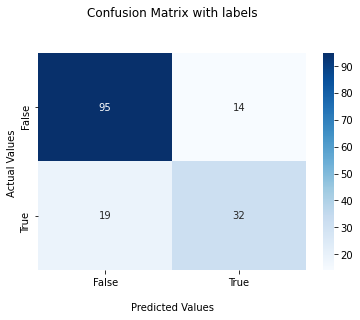

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


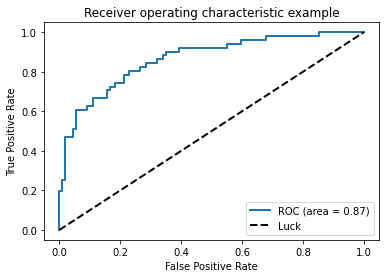

acc: 0.8125
prec: 0.7333333333333333
rec: 0.6470588235294118
Classification report - GradientBoostingClassifier:
Success ratio: 76.85%
              precision    recall  f1-score   support

       False       0.84      0.89      0.87       109
        True       0.73      0.65      0.69        51

    accuracy                           0.81       160
   macro avg       0.79      0.77      0.78       160
weighted avg       0.81      0.81      0.81       160

Confusion matrix: 
[[97 12]
 [18 33]]


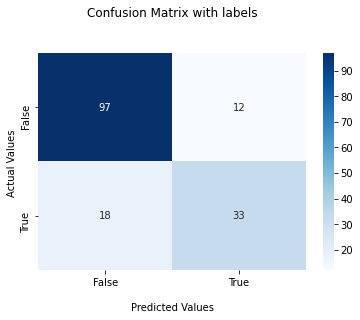

 
CV = 2



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


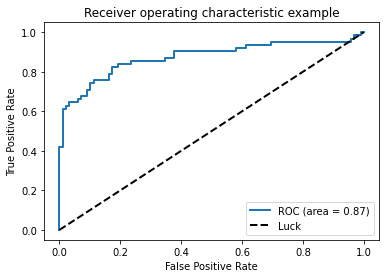

acc: 0.83125
prec: 0.8070175438596491
rec: 0.7419354838709677
Classification report - GradientBoostingClassifier:
Success ratio: 81.48%
              precision    recall  f1-score   support

       False       0.84      0.89      0.87        98
        True       0.81      0.74      0.77        62

    accuracy                           0.83       160
   macro avg       0.83      0.81      0.82       160
weighted avg       0.83      0.83      0.83       160

Confusion matrix: 
[[87 11]
 [16 46]]


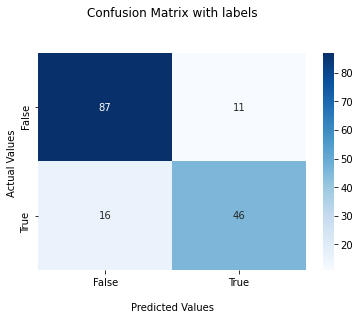

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


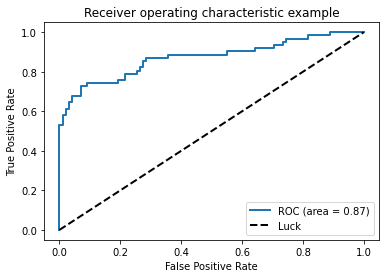

acc: 0.7875
prec: 0.7121212121212122
rec: 0.7580645161290323
Classification report - GradientBoostingClassifier:
Success ratio: 78.21%
              precision    recall  f1-score   support

       False       0.84      0.81      0.82        98
        True       0.71      0.76      0.73        62

    accuracy                           0.79       160
   macro avg       0.78      0.78      0.78       160
weighted avg       0.79      0.79      0.79       160

Confusion matrix: 
[[79 19]
 [15 47]]


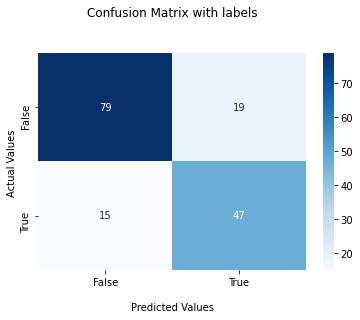

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


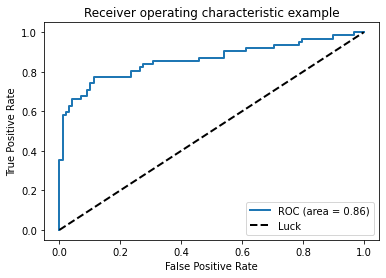

acc: 0.83125
prec: 0.8301886792452831
rec: 0.7096774193548387
Classification report - GradientBoostingClassifier:
Success ratio: 80.89%
              precision    recall  f1-score   support

       False       0.83      0.91      0.87        98
        True       0.83      0.71      0.77        62

    accuracy                           0.83       160
   macro avg       0.83      0.81      0.82       160
weighted avg       0.83      0.83      0.83       160

Confusion matrix: 
[[89  9]
 [18 44]]


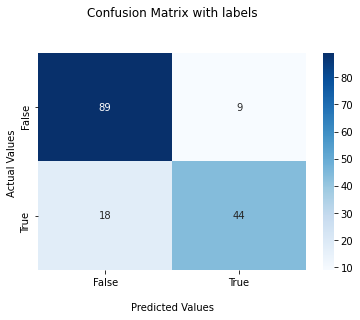

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


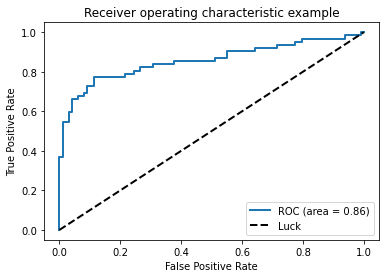

acc: 0.83125
prec: 0.8181818181818182
rec: 0.7258064516129032
Classification report - GradientBoostingClassifier:
Success ratio: 81.19%
              precision    recall  f1-score   support

       False       0.84      0.90      0.87        98
        True       0.82      0.73      0.77        62

    accuracy                           0.83       160
   macro avg       0.83      0.81      0.82       160
weighted avg       0.83      0.83      0.83       160

Confusion matrix: 
[[88 10]
 [17 45]]


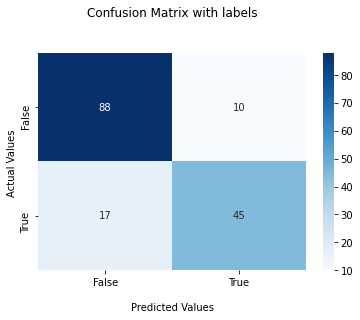

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


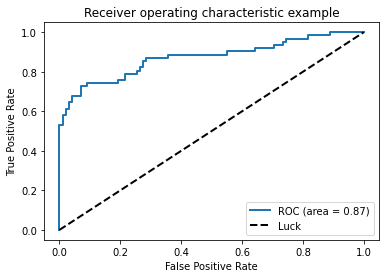

acc: 0.7875
prec: 0.7121212121212122
rec: 0.7580645161290323
Classification report - GradientBoostingClassifier:
Success ratio: 78.21%
              precision    recall  f1-score   support

       False       0.84      0.81      0.82        98
        True       0.71      0.76      0.73        62

    accuracy                           0.79       160
   macro avg       0.78      0.78      0.78       160
weighted avg       0.79      0.79      0.79       160

Confusion matrix: 
[[79 19]
 [15 47]]


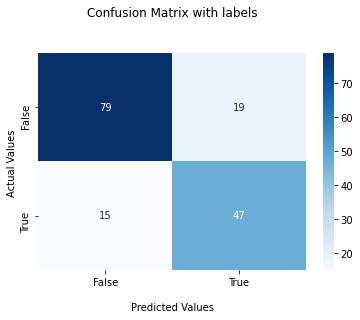

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


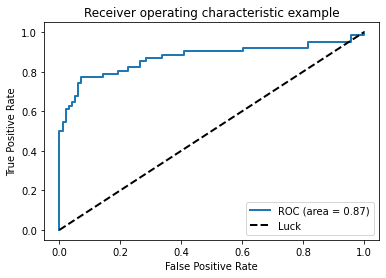

acc: 0.85
prec: 0.8275862068965517
rec: 0.7741935483870968
Classification report - GradientBoostingClassifier:
Success ratio: 83.61%
              precision    recall  f1-score   support

       False       0.86      0.90      0.88        98
        True       0.83      0.77      0.80        62

    accuracy                           0.85       160
   macro avg       0.85      0.84      0.84       160
weighted avg       0.85      0.85      0.85       160

Confusion matrix: 
[[88 10]
 [14 48]]


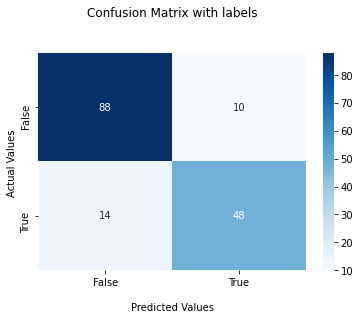

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


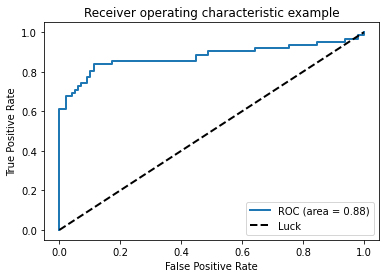

acc: 0.85625
prec: 0.8305084745762712
rec: 0.7903225806451613
Classification report - GradientBoostingClassifier:
Success ratio: 84.41%
              precision    recall  f1-score   support

       False       0.87      0.90      0.88        98
        True       0.83      0.79      0.81        62

    accuracy                           0.86       160
   macro avg       0.85      0.84      0.85       160
weighted avg       0.86      0.86      0.86       160

Confusion matrix: 
[[88 10]
 [13 49]]


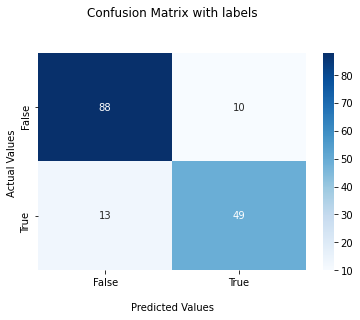

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


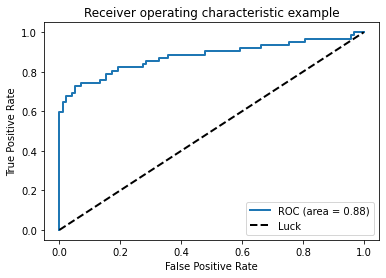

acc: 0.81875
prec: 0.7704918032786885
rec: 0.7580645161290323
Classification report - GradientBoostingClassifier:
Success ratio: 80.76%
              precision    recall  f1-score   support

       False       0.85      0.86      0.85        98
        True       0.77      0.76      0.76        62

    accuracy                           0.82       160
   macro avg       0.81      0.81      0.81       160
weighted avg       0.82      0.82      0.82       160

Confusion matrix: 
[[84 14]
 [15 47]]


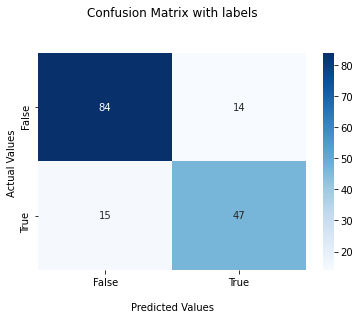

 
CV = 3



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


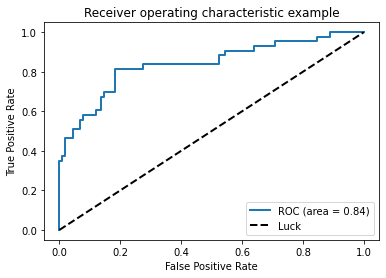

acc: 0.7987421383647799
prec: 0.6410256410256411
rec: 0.5813953488372093
Classification report - GradientBoostingClassifier:
Success ratio: 73.04%
              precision    recall  f1-score   support

       False       0.85      0.88      0.86       116
        True       0.64      0.58      0.61        43

    accuracy                           0.80       159
   macro avg       0.75      0.73      0.74       159
weighted avg       0.79      0.80      0.80       159

Confusion matrix: 
[[102  14]
 [ 18  25]]


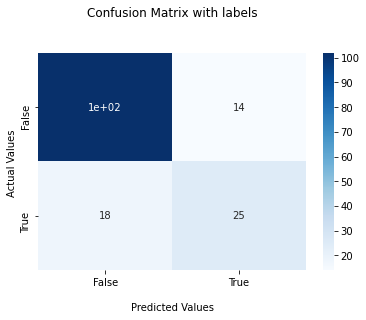

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


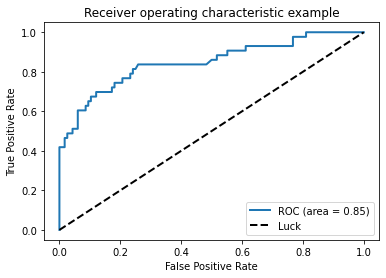

acc: 0.8301886792452831
prec: 0.7
rec: 0.6511627906976745
Classification report - GradientBoostingClassifier:
Success ratio: 77.39%
              precision    recall  f1-score   support

       False       0.87      0.90      0.89       116
        True       0.70      0.65      0.67        43

    accuracy                           0.83       159
   macro avg       0.79      0.77      0.78       159
weighted avg       0.83      0.83      0.83       159

Confusion matrix: 
[[104  12]
 [ 15  28]]


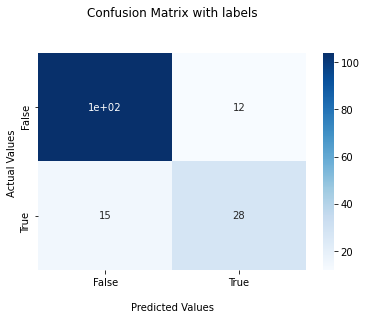

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


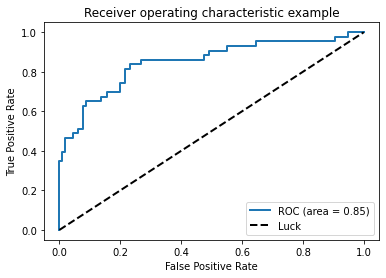

acc: 0.8427672955974843
prec: 0.7368421052631579
rec: 0.6511627906976745
Classification report - GradientBoostingClassifier:
Success ratio: 78.25%
              precision    recall  f1-score   support

       False       0.88      0.91      0.89       116
        True       0.74      0.65      0.69        43

    accuracy                           0.84       159
   macro avg       0.81      0.78      0.79       159
weighted avg       0.84      0.84      0.84       159

Confusion matrix: 
[[106  10]
 [ 15  28]]


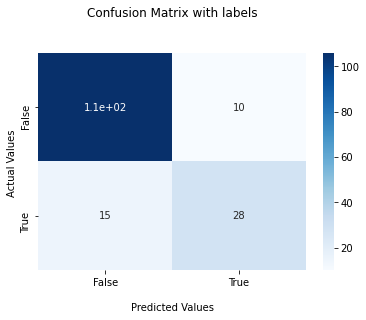

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


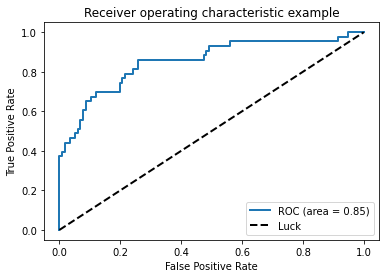

acc: 0.8364779874213837
prec: 0.717948717948718
rec: 0.6511627906976745
Classification report - GradientBoostingClassifier:
Success ratio: 77.82%
              precision    recall  f1-score   support

       False       0.88      0.91      0.89       116
        True       0.72      0.65      0.68        43

    accuracy                           0.84       159
   macro avg       0.80      0.78      0.79       159
weighted avg       0.83      0.84      0.83       159

Confusion matrix: 
[[105  11]
 [ 15  28]]


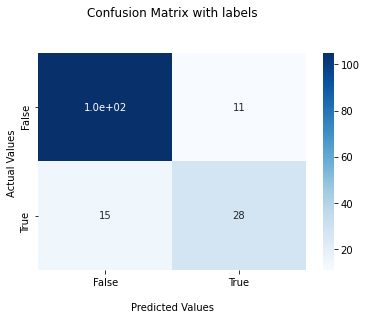

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


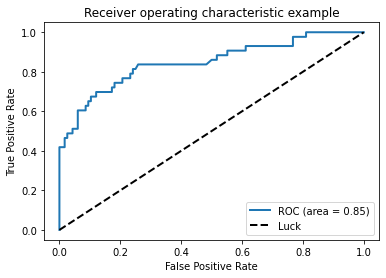

acc: 0.8301886792452831
prec: 0.7
rec: 0.6511627906976745
Classification report - GradientBoostingClassifier:
Success ratio: 77.39%
              precision    recall  f1-score   support

       False       0.87      0.90      0.89       116
        True       0.70      0.65      0.67        43

    accuracy                           0.83       159
   macro avg       0.79      0.77      0.78       159
weighted avg       0.83      0.83      0.83       159

Confusion matrix: 
[[104  12]
 [ 15  28]]


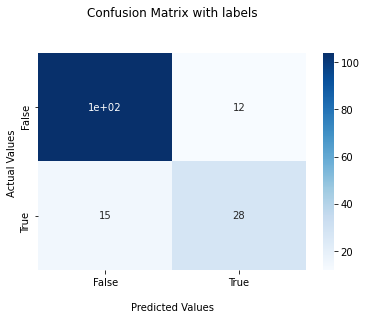

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


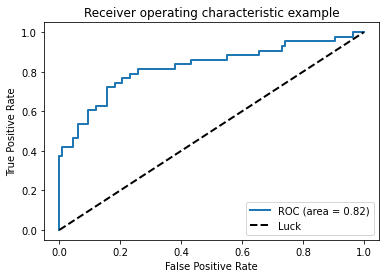

acc: 0.7924528301886793
prec: 0.6136363636363636
rec: 0.627906976744186
Classification report - GradientBoostingClassifier:
Success ratio: 74.07%
              precision    recall  f1-score   support

       False       0.86      0.85      0.86       116
        True       0.61      0.63      0.62        43

    accuracy                           0.79       159
   macro avg       0.74      0.74      0.74       159
weighted avg       0.79      0.79      0.79       159

Confusion matrix: 
[[99 17]
 [16 27]]


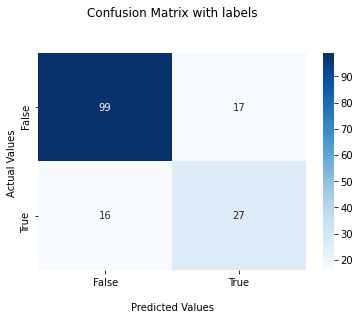

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


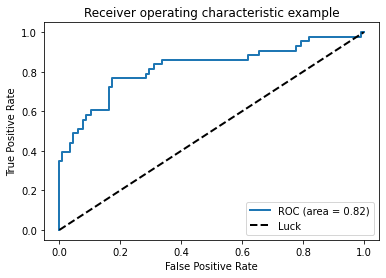

acc: 0.8050314465408805
prec: 0.65
rec: 0.6046511627906976
Classification report - GradientBoostingClassifier:
Success ratio: 74.20%
              precision    recall  f1-score   support

       False       0.86      0.88      0.87       116
        True       0.65      0.60      0.63        43

    accuracy                           0.81       159
   macro avg       0.75      0.74      0.75       159
weighted avg       0.80      0.81      0.80       159

Confusion matrix: 
[[102  14]
 [ 17  26]]


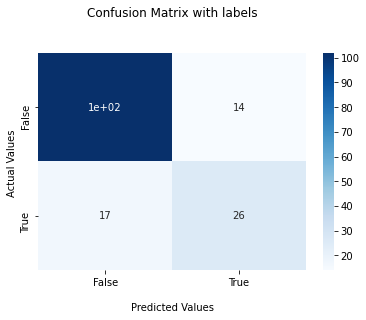

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


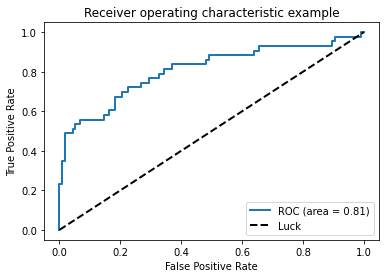

acc: 0.779874213836478
prec: 0.6
rec: 0.5581395348837209
Classification report - GradientBoostingClassifier:
Success ratio: 71.01%
              precision    recall  f1-score   support

       False       0.84      0.86      0.85       116
        True       0.60      0.56      0.58        43

    accuracy                           0.78       159
   macro avg       0.72      0.71      0.71       159
weighted avg       0.78      0.78      0.78       159

Confusion matrix: 
[[100  16]
 [ 19  24]]


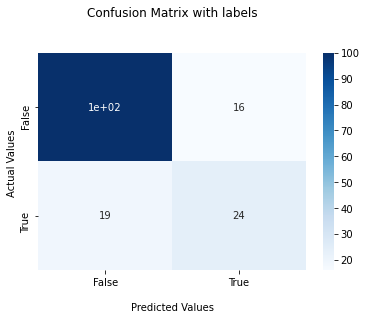

 
CV = 4



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


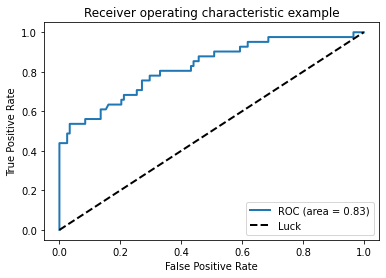

acc: 0.7672955974842768
prec: 0.5416666666666666
rec: 0.6341463414634146
Classification report - GradientBoostingClassifier:
Success ratio: 72.39%
              precision    recall  f1-score   support

       False       0.86      0.81      0.84       118
        True       0.54      0.63      0.58        41

    accuracy                           0.77       159
   macro avg       0.70      0.72      0.71       159
weighted avg       0.78      0.77      0.77       159

Confusion matrix: 
[[96 22]
 [15 26]]


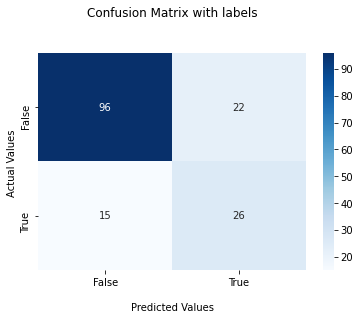

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


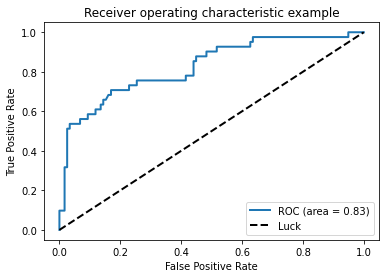

acc: 0.7987421383647799
prec: 0.5957446808510638
rec: 0.6829268292682927
Classification report - GradientBoostingClassifier:
Success ratio: 76.10%
              precision    recall  f1-score   support

       False       0.88      0.84      0.86       118
        True       0.60      0.68      0.64        41

    accuracy                           0.80       159
   macro avg       0.74      0.76      0.75       159
weighted avg       0.81      0.80      0.80       159

Confusion matrix: 
[[99 19]
 [13 28]]


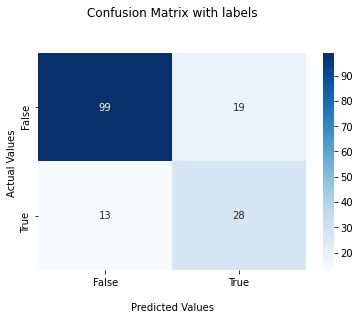

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


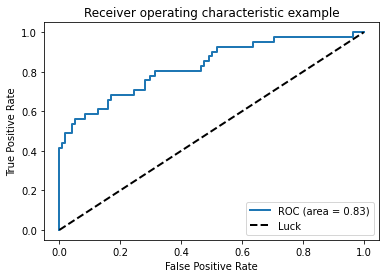

acc: 0.7861635220125787
prec: 0.5777777777777777
rec: 0.6341463414634146
Classification report - GradientBoostingClassifier:
Success ratio: 73.66%
              precision    recall  f1-score   support

       False       0.87      0.84      0.85       118
        True       0.58      0.63      0.60        41

    accuracy                           0.79       159
   macro avg       0.72      0.74      0.73       159
weighted avg       0.79      0.79      0.79       159

Confusion matrix: 
[[99 19]
 [15 26]]


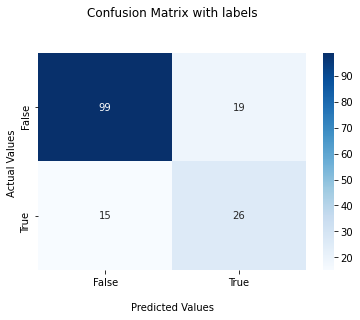

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


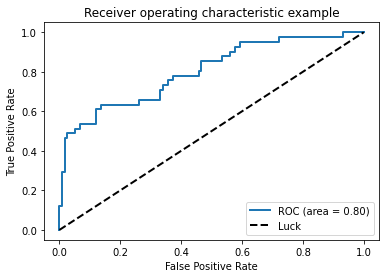

acc: 0.7861635220125787
prec: 0.5777777777777777
rec: 0.6341463414634146
Classification report - GradientBoostingClassifier:
Success ratio: 73.66%
              precision    recall  f1-score   support

       False       0.87      0.84      0.85       118
        True       0.58      0.63      0.60        41

    accuracy                           0.79       159
   macro avg       0.72      0.74      0.73       159
weighted avg       0.79      0.79      0.79       159

Confusion matrix: 
[[99 19]
 [15 26]]


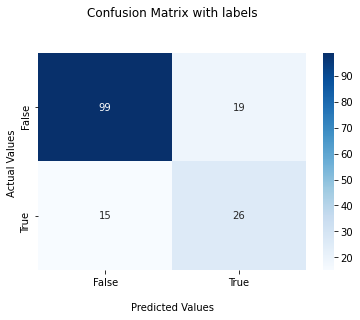

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


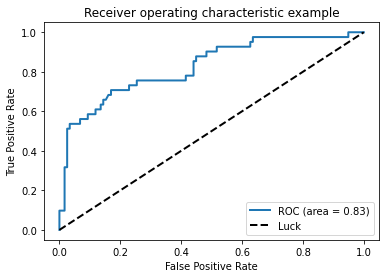

acc: 0.7987421383647799
prec: 0.5957446808510638
rec: 0.6829268292682927
Classification report - GradientBoostingClassifier:
Success ratio: 76.10%
              precision    recall  f1-score   support

       False       0.88      0.84      0.86       118
        True       0.60      0.68      0.64        41

    accuracy                           0.80       159
   macro avg       0.74      0.76      0.75       159
weighted avg       0.81      0.80      0.80       159

Confusion matrix: 
[[99 19]
 [13 28]]


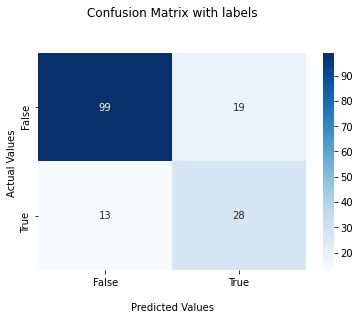

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


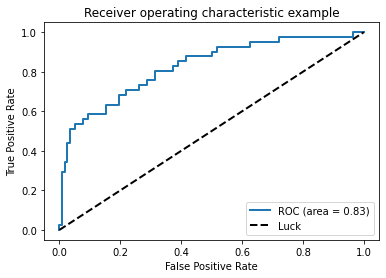

acc: 0.7861635220125787
prec: 0.5777777777777777
rec: 0.6341463414634146
Classification report - GradientBoostingClassifier:
Success ratio: 73.66%
              precision    recall  f1-score   support

       False       0.87      0.84      0.85       118
        True       0.58      0.63      0.60        41

    accuracy                           0.79       159
   macro avg       0.72      0.74      0.73       159
weighted avg       0.79      0.79      0.79       159

Confusion matrix: 
[[99 19]
 [15 26]]


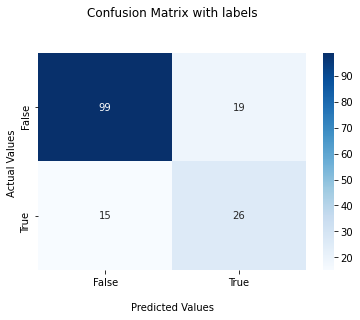

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


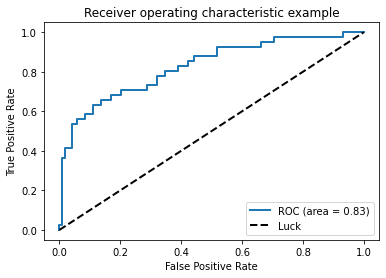

acc: 0.7987421383647799
prec: 0.6
rec: 0.6585365853658537
Classification report - GradientBoostingClassifier:
Success ratio: 75.30%
              precision    recall  f1-score   support

       False       0.88      0.85      0.86       118
        True       0.60      0.66      0.63        41

    accuracy                           0.80       159
   macro avg       0.74      0.75      0.74       159
weighted avg       0.81      0.80      0.80       159

Confusion matrix: 
[[100  18]
 [ 14  27]]


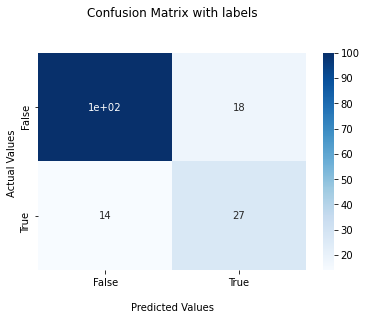

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


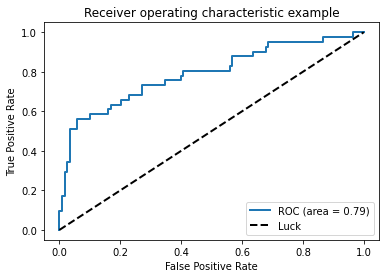

acc: 0.779874213836478
prec: 0.5652173913043478
rec: 0.6341463414634146
Classification report - GradientBoostingClassifier:
Success ratio: 73.23%
              precision    recall  f1-score   support

       False       0.87      0.83      0.85       118
        True       0.57      0.63      0.60        41

    accuracy                           0.78       159
   macro avg       0.72      0.73      0.72       159
weighted avg       0.79      0.78      0.78       159

Confusion matrix: 
[[98 20]
 [15 26]]


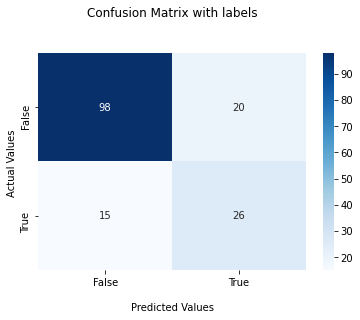

In [29]:
# Build a forest and compute the feature importances
text_export = []
success_ratio = {}
acc_results = {}
prec_results = {}
rec_results = {}
roc_results = {}


text_export = []

for clf in classifiers:
    success_ratio[clf] = list()
    acc_results[clf] = list()
    prec_results[clf] = list()
    rec_results[clf] = list()
    roc_results[clf] = list()

for i in range(k):
    print("CV = " + str(i) + "\n")
    
    for clf in classifiers:
        classifier_name = str(clf.__class__.__name__)                
        probabilities = clf.fit(X_train[i], y_train[i]).predict_proba(X_test[i])     
        predicted = clf.predict(X_test[i])
        
        fpr, tpr, _ = roc_curve(y_test[i], probabilities[:, 1]) 
        roc_auc = auc(fpr, tpr)
        
        # plot ROC
        plt.plot(fpr, tpr, lw=2, label='ROC (area = %0.2f)' % (roc_auc))
        plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k', 
                 label='Luck')                

        plt.xlim([-0.05, 1.05])
        plt.ylim([-0.05, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic example')
        plt.legend(loc="lower right")
        plt.show()
                
        report = classification_report(y_true = y_test[i], y_pred = predicted)                
        precision, recall, fscore, support = score(y_true = y_test[i], y_pred = predicted)
        
        acc = accuracy_score(y_true = y_test[i], y_pred = predicted)
        prec = precision_score(y_true = y_test[i], y_pred = predicted)
        rec = recall_score(y_true = y_test[i], y_pred = predicted)
        
        print("acc:", acc)
        print("prec:", prec)
        print("rec:", rec)

        a = recall[0]
        b = recall[1]
        c = support[0]
        d = support[1]

        success_ratio[clf].append((a + b) / 2 * 100) # (recall false + recall true) / 2
        acc_results[clf].append(acc)
        prec_results[clf].append(prec)
        rec_results[clf].append(rec)
        roc_results[clf].append(roc_auc)

        print('Classification report - ' + classifier_name + ':')
        print('Success ratio: %.2f%%' % success_ratio[clf][i])
        print(report)
        print('Confusion matrix: ')
        cf_matrix = confusion_matrix(y_test[i], predicted)
        print(cf_matrix)

        ax = sns.heatmap(cf_matrix, annot=True,cmap='Blues')
        ax.set_title('Confusion Matrix with labels\n\n')
        ax.set_xlabel('\nPredicted Values')
        ax.set_ylabel('Actual Values ')
        ax.xaxis.set_ticklabels(['False','True'])
        ax.yaxis.set_ticklabels(['False','True'])

        # Display the visualization of the Confusion Matrix.
        plt.show()
        print(' ')
        
        text_export.append('Klasifikačný report pre ' + classifier_name + ':')
        text_export.append('Úspešnosť: %.2f%%' % success_ratio[clf][i])
        text_export.append("Acc: " + str(acc))
        text_export.append("Prec: " + str(prec))
        text_export.append("Rec: " + str(rec))
        text_export.append("ROC: " + str(roc_auc))
        text_export.append(report)
        text_export.append('')
        
np.savetxt('results/report_2.txt', text_export, fmt='%s', encoding='utf-8-sig')

In [30]:
for clf in classifiers:
    print(str(clf))
    print(str(round(mean(success_ratio[clf]),2)) + " %")
    print(str(round(mean(acc_results[clf]),2)))
    print(str(round(mean(prec_results[clf]),2)))
    print(str(round(mean(rec_results[clf]),2)))
    print(str(round(mean(roc_results[clf]),2)))
    print()

GradientBoostingClassifier()
76.35 %
0.8
0.68
0.67
0.86

GradientBoostingClassifier(max_depth=2)
77.22 %
0.8
0.68
0.7
0.86

GradientBoostingClassifier(max_depth=4)
77.85 %
0.81
0.72
0.68
0.86

GradientBoostingClassifier(max_depth=4, n_estimators=120)
77.42 %
0.81
0.71
0.68
0.85

GradientBoostingClassifier(max_depth=2, min_samples_split=5)
77.22 %
0.8
0.68
0.7
0.86

GradientBoostingClassifier(learning_rate=0.5, max_depth=2, min_samples_split=5)
77.2 %
0.81
0.69
0.68
0.85

GradientBoostingClassifier(learning_rate=0.5, max_depth=2, min_samples_leaf=2,
                           min_samples_split=5)
76.66 %
0.81
0.7
0.66
0.84

GradientBoostingClassifier(learning_rate=0.5, max_depth=2, max_features='sqrt',
                           min_samples_leaf=2, min_samples_split=5)
75.37 %
0.79
0.67
0.66
0.84

